# PCA

## Task 1: EDA

In [1]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset

wine_data = pd.read_csv('wine.csv')
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine_data.shape

(178, 14)

In [28]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
# checking for missing values
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

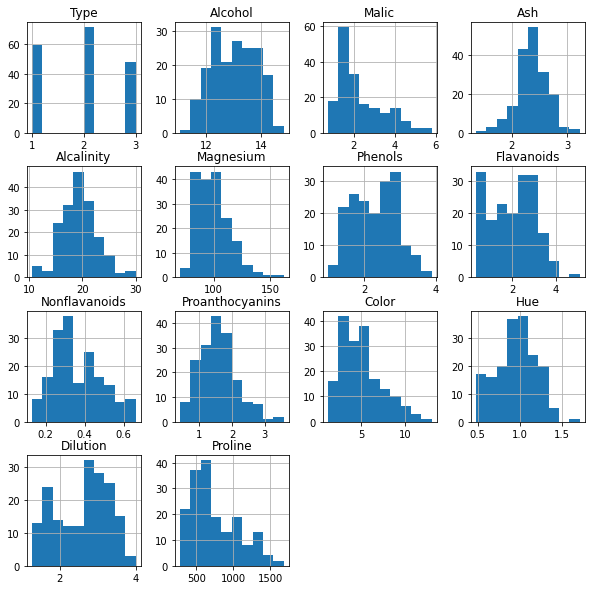

In [27]:
# feature distribution

wine_data.hist(figsize=(10, 10))
plt.show() #plotting histograms

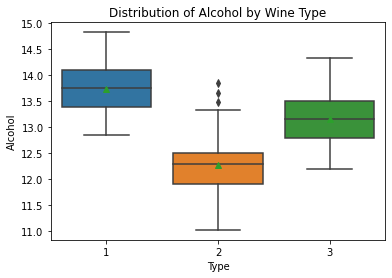

In [30]:
sns.boxplot(data=wine_data,x="Type", y="Alcohol",showmeans=True)
plt.title("Distribution of Alcohol by Wine Type") 
plt.show()

In [7]:
correlation = wine_data.corr()
print(correlation)

                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

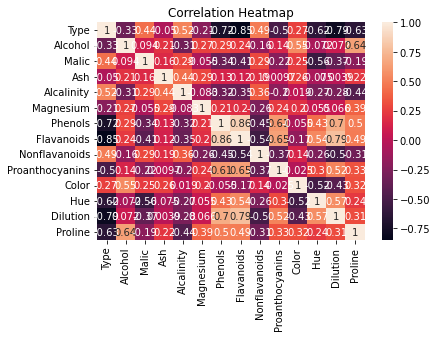

In [8]:
# plotting heatmap
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

## Task 2: Dimensionality Reduction with PCA:

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
# standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_data)

In [11]:
#implementing pca
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

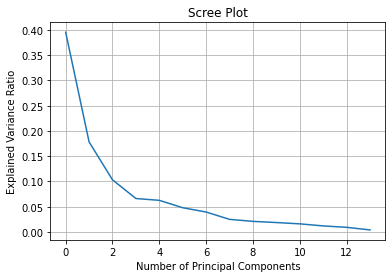

In [12]:
# scree plot
explained_variance = pca.explained_variance_ratio_
plt.plot(explained_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.show()

In [13]:
pca = PCA(n_components=2)  
reduced_data = pca.fit_transform(scaled_data) # transforming the data again
print(reduced_data)

[[-3.5229339  -1.45309844]
 [-2.52885806  0.33001925]
 [-2.78502898 -1.03693595]
 [-3.92258841 -2.76821026]
 [-1.40751111 -0.86777309]
 [-3.28812981 -2.13017513]
 [-2.75057754 -1.17916999]
 [-2.39286652 -1.61128232]
 [-2.79525633 -0.92317952]
 [-3.00559666 -0.79628417]
 [-3.67868855 -1.31252342]
 [-2.10963477 -0.61298199]
 [-2.43845636 -0.67852331]
 [-3.67349453 -1.14012136]
 [-4.44157575 -2.11031917]
 [-2.60892387 -1.66641801]
 [-2.47542846 -2.33089672]
 [-2.22623243 -1.63359016]
 [-3.74226929 -2.52840527]
 [-2.3944115  -1.06452946]
 [-3.33656895 -0.79601279]
 [-1.48140399 -0.24008547]
 [-2.82806867  0.08685755]
 [-2.00771405  0.51561649]
 [-2.11463604  0.31592057]
 [-1.39753751 -0.93821529]
 [-2.13348803 -0.68710205]
 [-1.62970383  0.09118403]
 [-2.50760753 -0.69274983]
 [-2.55948318 -0.1954729 ]
 [-2.77244452 -1.24635279]
 [-2.93513374 -1.47827883]
 [-1.99124842 -0.05325201]
 [-2.24570987 -1.6346691 ]
 [-1.78698628 -0.69748039]
 [-2.22763867 -0.17928892]
 [-1.76802847 -0.65787231]
 

## Task 3: Clustering with Original Data:

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [15]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(wine_data)

KMeans(n_clusters=3)

In [16]:
cluster_labels = kmeans.labels_

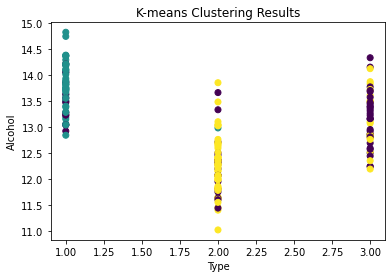

In [17]:
# using scatterplot to visualize scatter plot
plt.scatter(wine_data["Type"], wine_data["Alcohol"], c=cluster_labels)  # Replace features with your desired axes
plt.xlabel("Type")
plt.ylabel("Alcohol")
plt.title("K-means Clustering Results")
plt.show()


In [18]:
silhouette_coeff = silhouette_score(wine_data, cluster_labels)
print("Silhouette Score:", silhouette_coeff)


Silhouette Score: 0.5711220218931753


In [19]:
db_score = davies_bouldin_score(wine_data, cluster_labels)
print("Davies-Bouldin Score:", db_score)


Davies-Bouldin Score: 0.5342660703679695


## Task 4: Clustering with PCA Data:

In [20]:
# K-means clustering on PCA-transformed data 
kmeans_pca = KMeans(n_clusters=3)  
kmeans_pca.fit(reduced_data)



KMeans(n_clusters=3)

In [21]:
cluster_labels_pca = kmeans_pca.labels_

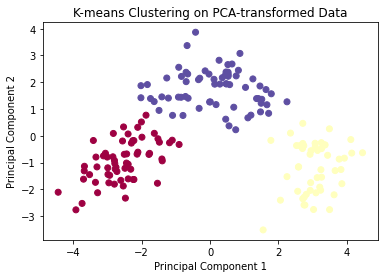

In [22]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels_pca, cmap='Spectral')  # Using different colormap
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering on PCA-transformed Data")
plt.show()


In [23]:
print("**Comparison:**")

print("Silhouette Score (Original):", silhouette_score(wine_data, cluster_labels))
print("Silhouette Score (PCA):", silhouette_score(reduced_data, cluster_labels_pca))
print("Davies-Bouldin Score (Original):", davies_bouldin_score(wine_data, cluster_labels))
print("Davies-Bouldin Score (PCA):", davies_bouldin_score(reduced_data, cluster_labels_pca))


**Comparison:**
Silhouette Score (Original): 0.5711220218931753
Silhouette Score (PCA): 0.6024415520362846
Davies-Bouldin Score (Original): 0.5342660703679695
Davies-Bouldin Score (PCA): 0.539707856257571


## Task 5: Comparison and Analysis:

Higher silhoutte score indicate better clustering. Original data score is 0.57 where as silhouette score for PCA data is 0.60 which indicates better clustering.

## Task 6: Conclusion and Insights

1. Key findings and insights:

I explored the wine dataset using EDA, examining feature distributions and correlations.
PCA has been implemented to reduce the dimensionality of the data.
k means clustering was applied to both the original and pca transformed data tp group wine samples based on their characteristics
The clustering performance is evaluated using silhouette score and davies-bouldin score.

2. Practical implications of PCA and clustering:

PCA: simplifies data analysis by reducing complexity
    useful for visualisation when dealing with many features.

clustering: groups data points into meaningful categories based on similarities

3. reccomendations for using pca and clustering

use pca when dealing with high dimensional data that might be computationally expensive for clustering algo
